In [1]:
import libpysal as ps
import numpy as np
from pointpats import PointPattern

In [2]:
input_data='test.shp'

fo = ps.io.open(input_data)
pp = PointPattern(np.asarray([pnt for pnt in fo]))
fo.close()

In [3]:
# Attributes of PySAL Point Patterns
pp.summary()

Point Pattern
731 points
Bounding rectangle [(13051629.99143524,3714032.5592773347), (13063534.475520302,3725509.196215702)]
Area of window: 136623441.7828369
Intensity estimate for window: 5.350472733382937e-06
              x             y
0  1.305903e+07  3.714033e+06
1  1.305903e+07  3.714033e+06
2  1.305908e+07  3.714041e+06
3  1.305908e+07  3.714041e+06
4  1.305943e+07  3.714086e+06


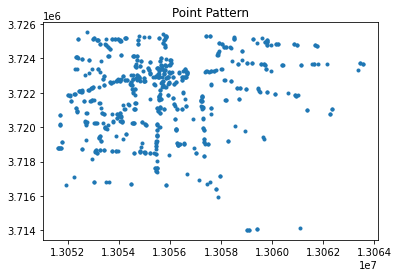

In [4]:
#  the coordinate information of points
pp.points
pp.head(5)
pp.tail()

# visualize the distribution of points
pp.plot()

intensity_1:  5.35047273338295e-06


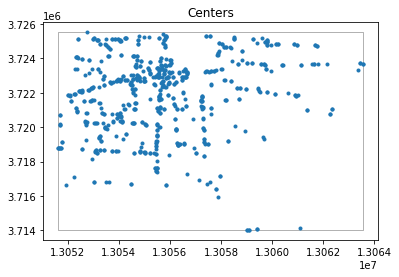

In [9]:
# intensity based on minimum bounding box:
pp.plot(title='Centers',window=True)
print("intensity_1: ",pp.lambda_mbb)

intensity_2:  6.811516687427142e-06


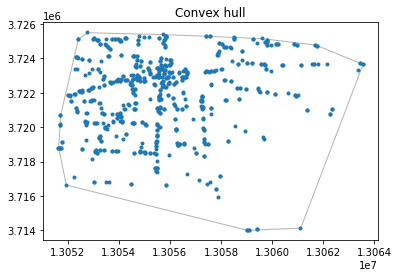

In [10]:
# intensity based on convex hull:
pp.plot(title='Convex hull',hull=True)
print("intensity_2: ",pp.lambda_hull)

[13055715.73847452  3721926.31628236]


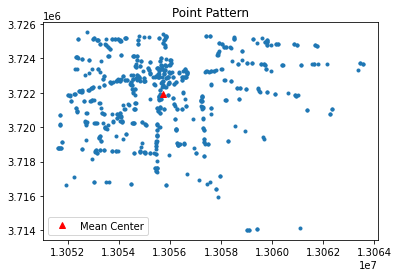

In [7]:
from pointpats.centrography import mean_center, weighted_mean_center, manhattan_median, std_distance, euclidean_median
import matplotlib.pyplot as plt

#Mean center of the points
mc = mean_center(pp.points)
print(mc)
pp.plot()
plt.plot(mc[0],mc[1],'r^',label='Mean Center')
plt.legend(numpoints=1)

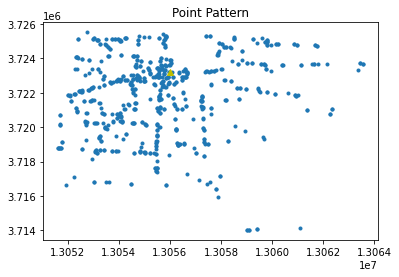

In [8]:
# Weighted Mean Center
weights = np.arange(731)  # add weights by yourself
wmc = weighted_mean_center(pp.points, weights)

# Manhattan Median
#mm = manhattan_median(pp.points)

# Euclidean Median
#em = euclidean_median(pp.points)

pp.plot()
plt.plot(wmc[0], wmc[1], 'y^')

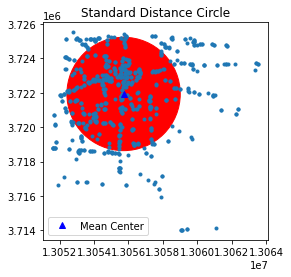

In [9]:
# Standard Distance circle
stdd = std_distance(pp.points)
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

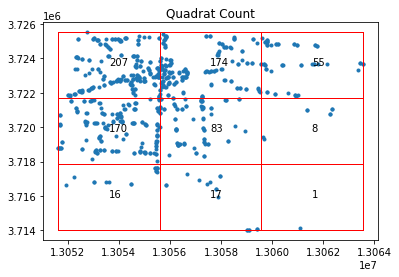

In [18]:
from pointpats import PointPattern, as_window
from pointpats import PoissonPointProcess as csr
import pointpats.quadrat_statistics as qs

q_r = qs.QStatistic(pp,shape= "rectangle",nx = 3, ny = 3)
q_r.plot()

In [21]:
#According to chi-squared, degree of freedom and p-value, determine whether the underlying process is  CSR or not
print("chi-squared test statistic: ",q_r.chi2) 
print("degree of freedom: ",q_r.df) 
print("analytical p value: ",q_r.chi2_pvalue)

chi-squared test statistic:  654.6922024623804
degree of freedom:  8
analytical p value:  4.038787590422375e-136


In [22]:
import scipy.spatial
from pointpats import PointPattern, PoissonPointProcess, as_window
from pointpats.distance_statistics import G, F, J, K, L, Genv, Fenv, Jenv, Kenv, Lenv

In [26]:
# one nearest neighbor (default)
knn=pp.knn()  
#The first array is the ids of the most nearest neighbor for each point, the second array is the distance between each point and its most nearest neighbor.
print(knn[0][0:5]) # the first five number of the first array
print(knn[1][0:5])

[[1]
 [0]
 [3]
 [2]
 [5]]
[[ 0.15184144]
 [ 0.15184144]
 [ 0.51074565]
 [ 0.51074565]
 [13.3258244 ]]


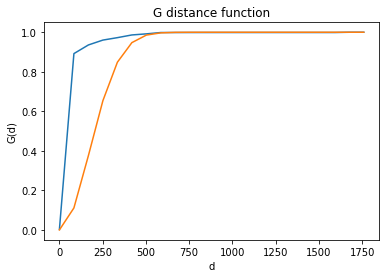

In [27]:
# if the G function plot is above the expectation this reflects clustering, while departures below expectation reflect dispersion.
gp1 = G(pp, intervals=20)
gp1.plot()

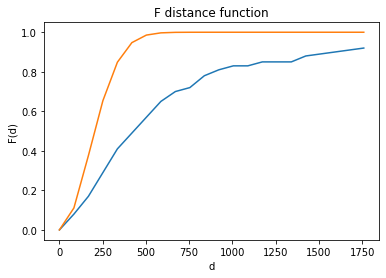

In [28]:
# a given number of randomly distributed points are generated in the domain and the nearest event neighbor distance is calculated for each point.
fp1 =  F(pp, intervals=20) # The default is to randomly generate 100 points.
fp1.plot()

/home/cym/anaconda3/lib/python3.8/site-packages/pointpats/_deprecated_distance_statistics.py:239: RuntimeWarning: invalid value encountered in true_divide
  self.ev = self.j / self.j


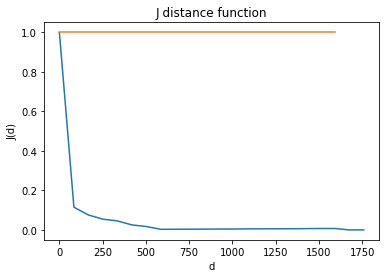

In [29]:
# J(r) = [1 - G(r)] / [1 - F(r)]
# If J(d)<1 the underlying point process is a cluster point process; if J(d)=1, the underlying point process is a random point process; otherwise, it is a regular point process.
jp1 = J(pp, intervals=20)
jp1.plot()

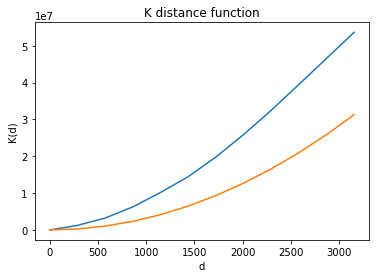

In [30]:
# CSR: K(d)=𝜋𝑑^2. K(d)>𝜋𝑑^2  indicates that the underlying point process is a cluster point process.
kp1 = K(pp)
kp1.plot()

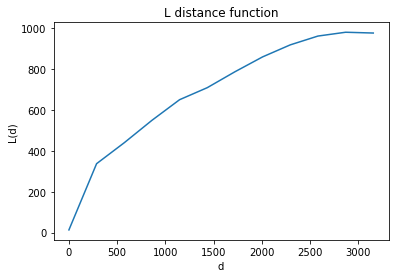

In [31]:
# L(r) = sqrt([ K(r) / π ])-r
# L(r) > 0 implies clustering, L(r) < 0 implies inhibition (regular process)
lp1 = L(pp)
lp1.plot()

In [32]:
# For every distance d, we sort the function values of the 100 simulated point patterns. Given a confidence level, say 95%, we can acquire the 2.5th and 97.5th value for every distance d. Thus, a simulation envelope is constructed.
csrs = PoissonPointProcess(pp.window, pp.n, 100, asPP=True)

'fenv = Fenv(pp, realizations=csrs)\nfenv.plot()\n\nkenv = Kenv(pp, realizations=csrs)\nkenv.plot()\n\nlenv = Lenv(pp, realizations=csrs)\nlenv.plot()'

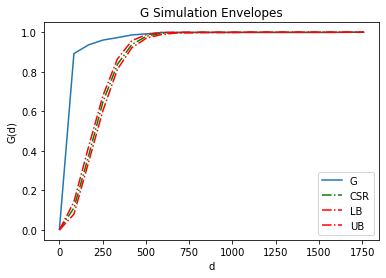

In [34]:
genv = Genv(pp, intervals = 20, realizations=csrs)
genv.plot()

'''fenv = Fenv(pp, realizations=csrs)
fenv.plot()

kenv = Kenv(pp, realizations=csrs)
kenv.plot()

lenv = Lenv(pp, realizations=csrs)
lenv.plot()'''